In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modelling

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [9]:
!pip install scikit-learn
!pip install catboost
!pip install xgboost


  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)


In [11]:
data=pd.read_csv('C:/Data Analyst/Generic_ML_Project/Notebook/Data/StudentsPerformance.csv')

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
#will predict maths score

X=data.drop(columns=['math score'],axis=1)

In [13]:
y=data['math score']

In [14]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ('onehotencoder',oh_transformer,cat_features),
        ('standardScaler',numeric_transformer,num_features)
    ]
)



In [15]:
X=preprocessor.fit_transform(X)

In [16]:
#train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2


In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K Nearest Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XG Boost": XGBRegressor(),
    "Cat Boosting Regressor": CatBoostRegressor(verbose=False),
    "Adaboost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(f"\n📌 {name}")
    print(f"Train MAE:  {model_train_mae:.4f}")
    print(f"Train RMSE: {model_train_rmse:.4f}")
    print(f"Train R2:   {model_train_r2:.4f}")
    print(f"Test MAE:   {model_test_mae:.4f}")
    print(f"Test RMSE:  {model_test_rmse:.4f}")
    print(f"Test R2:    {model_test_r2:.4f}")

    model_list.append(name)
    r2_list.append(model_test_r2)



📌 Linear Regression
Train MAE:  4.2667
Train RMSE: 5.3231
Train R2:   0.8743
Test MAE:   4.2148
Test RMSE:  5.3940
Test R2:    0.8804

📌 Lasso
Train MAE:  5.2063
Train RMSE: 6.5938
Train R2:   0.8071
Test MAE:   5.1579
Test RMSE:  6.5197
Test R2:    0.8253

📌 Ridge
Train MAE:  4.2650
Train RMSE: 5.3233
Train R2:   0.8743
Test MAE:   4.2111
Test RMSE:  5.3904
Test R2:    0.8806

📌 K Nearest Regressor
Train MAE:  4.5168
Train RMSE: 5.7079
Train R2:   0.8555
Test MAE:   5.6210
Test RMSE:  7.2530
Test R2:    0.7838

📌 Decision Tree
Train MAE:  0.0187
Train RMSE: 0.2795
Train R2:   0.9997
Test MAE:   6.4800
Test RMSE:  8.2012
Test R2:    0.7236

📌 Random Forest Regressor
Train MAE:  1.8357
Train RMSE: 2.3198
Train R2:   0.9761
Test MAE:   4.5863
Test RMSE:  5.9393
Test R2:    0.8550

📌 XG Boost
Train MAE:  0.6875
Train RMSE: 1.0073
Train R2:   0.9955
Test MAE:   5.0577
Test RMSE:  6.4733
Test R2:    0.8278

📌 Cat Boosting Regressor
Train MAE:  2.4054
Train RMSE: 3.0427
Train R2:   0.9589
T

In [22]:
import pandas as pd

results_df = pd.DataFrame({
    'Model': model_list,
    'R2_Score': r2_list
})

# Sort in descending order of R2 score
results_df = results_df.sort_values(by='R2_Score', ascending=False).reset_index(drop=True)

print("\n📊 Model Performance (Sorted by R²):")
print(results_df)



📊 Model Performance (Sorted by R²):
                     Model  R2_Score
0                    Ridge  0.880593
1        Linear Regression  0.880433
2  Random Forest Regressor  0.855036
3   Cat Boosting Regressor  0.851632
4       Adaboost Regressor  0.849831
5                 XG Boost  0.827797
6                    Lasso  0.825320
7      K Nearest Regressor  0.783813
8            Decision Tree  0.723595


In [24]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of model : %.2f"%score)

Accuracy of model : 88.04


Text(0, 0.5, 'Predicted')

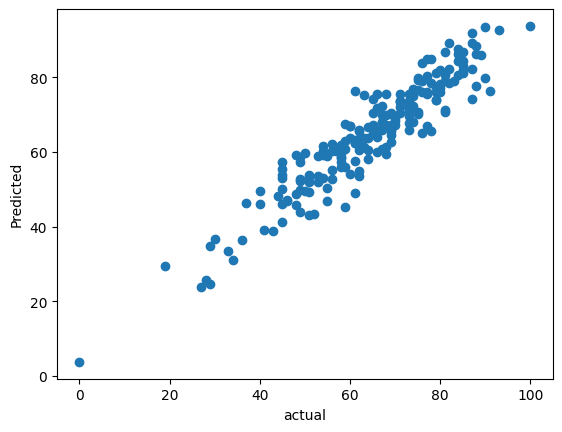

In [25]:
#plot y pred and y_test

plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

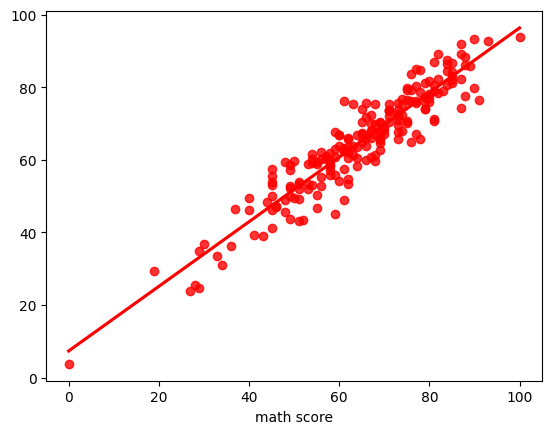

In [26]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')